# ***TRABAJO PRACTICO- REDES NEURONALES***




#Apellido, Nombre, DNI, email de todos los integrantes del grupo

Escribir aqui los datos de los integrantes de grupos:
\

Franco, Cristian Oscar, 39039686


Hola gente en este INTEGRADOR 2, se les proporcionará un csv (csv=base de datos=un data set con columnas y filas) de ciudades de Argentina, los mismos contienen los registros de Máxima y Mínima temperatura que ocurren en las ciudades a lo largo de un año.


## Links de interes

* DRIVE DE LA COMISION 3, alli hallaran el csv CORREGIDO: [Drive Comision 3](https://drive.google.com/drive/u/1/folders/1qLsgA7WGZgfTUYeKy7wMGsDF4v52Myq5)
* CSV obtenida del registro nacional de las siguientes enlaces: 
    * [detalle de la base de datos](https://datos.gob.ar/dataset/smn-registro-temperatura-365-dias/archivo/smn_5.1)
    * [REGISTRO DE TEMPERATURA 365 DIAS](https://www.smn.gob.ar/descarga-de-datos).
* La base de datos también podra ser descargada del siguiente enlace del drive [BASE DE DATOS](https://drive.google.com/drive/folders/18rTLeY5A8DOwz39TB563HPHIpZTJM3CA?usp=sharing)

## Incisos
Se deberá ralizar los siguientes pasos.

In [304]:
#Importamos librerias necesarias
import pandas as pd;
import numpy as np;


1. Seleccionar una ciudad y construir una nueva base de datos(Crear una MATRIZ, pasarla a DATA FRAME y de alli a archivo csv) tomando las temperaturas promedios de cada dia, de dicha ciudad (podras hacer el calculo de los promedios a partir de todas las temperaturas que halles entre la maxima y la minima de cada dia)

\

BASICAMENTE SERIA:
\

1a- (en este caso seria pasar el csv(Original) a DATA FRAME de alli TRABAJARLO, ANALIZARLO, PROCESARLO, ETC.)

1b- Luego de TRABAJARLO y tener los RESULTADOS(RESULTADOS=vectores con numeros)

1c- Componer una MATRIZ(Nuevo) con esos vectores(hacerlos a los vectores filas o columnas depende de lo que requiera)

1d- por ultimo convertir esa MATRIZ(que estaria compuesta por los vectores que son nuevos resultados) convertir esa matriz en un DATA FRAME(con etiquetas etc)

1e- Y a ese DATA FRAME convertirlo en un CSV

\

Graficar dichos datos(regre...) TIEMPO VS TEMPERATURA Y SELECCIONAR UN PERIODO DE TIEMPO DONDE LA GRAFICA SEA CRECIENTE. Esto servira para construir una nueva base de datos(csv).
(Esto de graficar piensenlo un poquito...)

\

In [305]:
# Leemos el CSV y mostarmos un pantallazo
df = pd.read_csv("registro_temperatura365-ordenado-y-separado (1).csv")
df.head(10)

,FECHA,TMAX,TMIN,NOMBRE
0,29102,23.0,17.9,AEROPARQUE AERO
1,28102,26.0,18.7,AEROPARQUE AERO
2,27102,25.2,18.0,AEROPARQUE AERO
3,26102,23.0,13.0,AEROPARQUE AERO
4,25102,18.7,10.5,AEROPARQUE AERO
5,24102,19.6,13.5,AEROPARQUE AERO
6,23102,20.0,16.3,AEROPARQUE AERO
7,22102,24.0,18.5,AEROPARQUE AERO
8,21102,23.0,17.0,AEROPARQUE AERO
9,20102,22.5,15.6,AEROPARQUE AERO


In [306]:
df.describe()

,FECHA
count,43679.000000
mean,15784.150461
std,8800.530816
min,1012.000000
25%,8082.000000
50%,16032.000000
75%,23102.000000
max,31122.000000


In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43679 entries, 0 to 43678
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   FECHA   43679 non-null  int64 
 1   TMAX    43679 non-null  object
 2   TMIN    43679 non-null  object
 3   NOMBRE  43679 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.3+ MB


In [308]:
# Vemos que hay 4 columnas:
# FECHA Contiene la fecha, el cual contiene INT
# TMAX Contiene La temperatura maxima de esa fecha, pero contiene STRING
# TMIN Contiene La temperatura minima de esa fecha, al igual que la columna anterior contiene STRING
# NOMBRE Contiene el nombre de la ciudad en la cual se midieron esas temperatura, la cual contiene STRING

# Antes de continuar vamos a solucionar el tema de los tipos, Dado que TMAX y TMIN deberian ser de tipo float y FECHA deberia ser de tipo STRING

df.loc[:, 'FECHA'] = df['FECHA'].astype(str) 

df.loc[:, 'TMAX'] = df['TMAX'].str.strip()
df.loc[:, 'TMAX'] = df['TMAX'].replace('', np.nan).astype(float)

df.loc[:, 'TMIN'] = df['TMIN'].str.strip()
df.loc[:, 'TMIN'] = df['TMIN'].replace('', np.nan).astype(float)

df_limpio = df.dropna()
df_limpio.info()

# En este punto tenemos a todas las columnas como string, y le aplique strip y replace a TMAX y TMIN porque tenian espacios a derecha e
# izquierda innecesarios y algunos no tenian valores. Como hay filas con valores nulos, vamos a eliminarlas

# Queda tambien el hecho de que la fecha no tiene el formato correcto, agregamos a cada fecha un 3 dado que el formato  esta incompleto

# Agregamos el caracter 3
df_limpio.loc[:,'FECHA'] = df_limpio['FECHA'].apply(lambda x: x + '3')

# Convertimos al formato adecuado
df_limpio.loc[:,'FECHA'] = pd.to_datetime(df_limpio['FECHA'], format='%d%m%y', errors='coerce').dt.strftime('%d/%m/%Y')

# La linea anterior cuando nota que hay un error al parsear una fecha con error lo convierte a NaT Not at Time
df_limpio.info()

# limpiamos si es que hay algun NaT
df_limpio = df_limpio.dropna()
df_limpio.info()


<class 'pandas.core.frame.DataFrame'>
Index: 40030 entries, 0 to 43678
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   FECHA   40030 non-null  object
 1   TMAX    40030 non-null  object
 2   TMIN    40030 non-null  object
 3   NOMBRE  40030 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB


<class 'pandas.core.frame.DataFrame'>
Index: 40030 entries, 0 to 43678
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   FECHA   39807 non-null  object
 1   TMAX    40030 non-null  object
 2   TMIN    40030 non-null  object
 3   NOMBRE  40030 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 39807 entries, 0 to 43678
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   FECHA   39807 non-null  object
 1   TMAX    39807 non-null  object
 2   TMIN    39807 non-null  object
 3   NOMBRE  39807 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB


In [309]:
#Una vez limpio definimos ese contenido a df
df = df_limpio

# Veamos los nombres de las ciudades
agrupado = df['NOMBRE'].unique()
print(agrupado)

# Luego de ver los nombres genero un numero aleatorio que representara la posicion del nombre de la ciudad
# De esta manera elegiré mi ciudad aleatoriamente


[' AEROPARQUE AERO' ' AZUL AERO' ' BAHIA BLANCA AERO' ' BARILOCHE AERO'
 ' BASE BELGRANO II' ' BASE CARLINI (EX JUBANY)' ' BASE ESPERANZA'
 ' BASE MARAMBIO' ' BASE ORCADAS' ' BASE SAN MARTIN' ' BENITO JUAREZ AERO'
 ' BERNARDO DE IRIGOYEN AERO' ' BOLIVAR AERO' ' BUENOS AIRES OBSERVATORIO'
 ' CAMPO DE MAYO AERO' ' CATAMARCA AERO' ' CERES AERO' ' CHAMICAL AERO'
 ' CHAPELCO AERO' ' CHEPES' ' CHILECITO AERO' ' CIPOLLETTI'
 ' COMODORO RIVADAVIA AERO' ' CONCORDIA AERO' ' CORDOBA AERO'
 ' CORDOBA OBSERVATORIO' ' CORONEL PRINGLES AERO' ' CORONEL SUAREZ AERO'
 ' CORRIENTES AERO' ' DOLORES AERO' ' EL BOLSON AERO' ' EL CALAFATE AERO'
 ' EL PALOMAR AERO' ' ESCUELA DE AVIACION MILITAR AERO' ' ESQUEL AERO'
 ' EZEIZA AERO' ' FORMOSA AERO' ' GENERAL PICO AERO'
 ' GOBERNADOR GREGORES AERO' ' GUALEGUAYCHU AERO' ' IGUAZU AERO'
 ' ITUZAINGO' ' JACHAL' ' JUJUY AERO' ' JUJUY U N' ' JUNIN AERO'
 ' LA PLATA AERO' ' LA QUIACA OBSERVATORIO' ' LA RIOJA AERO'
 ' LABOULAYE AERO' ' LAS FLORES' ' LAS LOMITAS' ' MALAR

In [310]:
# ciudad_elegida = agrupado[np.random.randint(0,len(agrupado))] #Comentado para no elegir otra ciudad
# print(f'Ciudad elegida aleatoriamente:{ciudad_elegida}')

# Para futuras puestas en marcha definiremos a mano esta variable dada la aleatoriedad de la eleccion
ciudad_elegida = 'BARILOCHE AERO'

In [311]:
# Elegida la ciudad, descartamos todos los otros datos
df_filtrado = df.loc[df['NOMBRE'] == ciudad_elegida]

df_filtrado.head()

,FECHA,TMAX,TMIN,NOMBRE


In [312]:
# Al parecer tenemos problemas con lo que seria el valor de la columan nombre, por lo que estuve averiguando podria contener los nombres con espacios
# innecesarios hacia la derecha y la izquierda, usaremos una funcion apply que utiliza una funcion para obtener una mascara y luego esa mascara la 
# usaremos para filtrar nuestro dataset

mask = df['NOMBRE'].apply(lambda x: x.strip() == ciudad_elegida)
df_filtrado = df[mask]
df_filtrado.head(10)

,FECHA,TMAX,TMIN,NOMBRE
1095,29/10/2023,3.5,-0.3,BARILOCHE AERO
1096,28/10/2023,8.4,0.1,BARILOCHE AERO
1097,27/10/2023,11.9,6.6,BARILOCHE AERO
1098,26/10/2023,14.4,6.6,BARILOCHE AERO
1099,25/10/2023,20.2,-0.6,BARILOCHE AERO
1100,24/10/2023,19.0,3.3,BARILOCHE AERO
1101,23/10/2023,19.0,7.5,BARILOCHE AERO
1102,22/10/2023,21.5,2.1,BARILOCHE AERO
1103,21/10/2023,21.8,4.2,BARILOCHE AERO
1104,20/10/2023,20.9,2.7,BARILOCHE AERO


In [313]:
# df_filtrado.loc[:, 'TPROM'] = (df_filtrado['TMAX'] + df_filtrado['TMIN']) / 2
df_filtrado.loc[:, 'TPROM'] = (df_filtrado['TMAX'] + df_filtrado['TMIN']) / 2
df_filtrado.head()

C:\Users\crist\AppData\Local\Temp\ipykernel_17796\1908534953.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado.loc[:, 'TPROM'] = (df_filtrado['TMAX'] + df_filtrado['TMIN']) / 2


,FECHA,TMAX,TMIN,NOMBRE,TPROM
1095,29/10/2023,3.5,-0.3,BARILOCHE AERO,1.6
1096,28/10/2023,8.4,0.1,BARILOCHE AERO,4.25
1097,27/10/2023,11.9,6.6,BARILOCHE AERO,9.25
1098,26/10/2023,14.4,6.6,BARILOCHE AERO,10.5
1099,25/10/2023,20.2,-0.6,BARILOCHE AERO,9.8


2.  Agregar a la nueva base de datos creada (Agrega a la matriz), del insciso anterior dos columna(osea agrega a la matriz dos columnas mas= pista: converti dos vectores (con numeros=resultados) en columna+etiquetas(etiquetas=variable)) con las siguientes variables (VARIABLE: PRECIO DEL KILO DE HELADO//COMPRA HELADO- VARIABLE CATEGORICA, RESPUESTA SI/NO), generadas a través de simulación aleatoria(ramd...):


   * VARIABLE: PRECIO DEL KILO DE HELADO- construir esta variable usando simulación aleatoria de regresión lineal en función de la temperatura. De manera que a mayor temperatura el precio sea MAYOR,  a menor temperatura el precio será menor. Definir el  rango del precio del helado y la tasa o porcentaje de incremento del precio
  
   * COMPRA HELADO: VARIABLE CATEGORICA , RESPUESTA SI/NO. Generar esta variable con simulación aleatoria de manera que si el precio del helado es mas del 40 % del precio inicial, la persona decide NO COMPRAR EL HELADO, ESTO SUCEDE CON UNA PROPORCION O PROBABILIDAD DEL 80% DE LA CANTIDAD TOTAL DE REGISTROS.


BASICAMENTE SERIA:

DOSa- Inclui una nueva columna llamada "PRECIO DEL HELADO" en la base de datos(MATRIZ) que creamos anteriormente. El precio del helado aumentara cuando haga calor y disminuira cuando haga frio.

DOSb- También añadiremos una columna llamada "COMPRA HELADO" que nos dirá si la gente decide comprar helado o no. Si el precio del helado es muy alto (más del 40% de lo normal), la respuesta será "No comprar el helado" en un 80% de los casos.
    ##########################
    "PRECIO DEL HELADO": Esta columna contendría los valores numéricos que representan el precio del helado para cada registro en la base de datos.

    "COMPRA HELADO": Esta columna sería categórica y contendría etiquetas "Sí" o "No" para indicar si una persona decide comprar o no el helado en cada registro.
    ##########################

Osea agregarías dos columnas adicionales a la base de datos QUE CREASTE, dichas columnas tendrias estas dos etiquetas que meciono arriba: "PRECIO HELADO","COMPRA HELADO"

\

In [315]:
# Segun lo que entiendo, el precio esta dado por una recta de la manera p = m * t + b, donde:
# p es precio
# m es la pendiente de la recta (cuanto sube o baja el precio por cada 1° que aumenta o baja)
# t temperatura promedio en este caso
# b es el precio que tendria el helado cuando la temperatura seria 0°. 

# Vamos a suponer que la menos temperatura a la cual una persona normal compra un helado es de -100 y el precio al cual lo compraria seria a $1.
# Vamos a suponer tambien que la mayor temperatura sera 50° y el precio en ese momento sera de $5000.
# Dadas esas suposiciones tenemos dos puntos de la recta que determinara el precio, tenemos (-100,1) y (50, 5000) 
# Calculamos m y b, 
# m = (y2 - y1) / (x2 - x1) -> En nuestro caso es m = (5000 - 1)/(50 - (-100)) = 33,32666... redondeando m = 33,33
# luego la recta que aproximadamente pasa por los 2 puntos es p - y1 = m(t - x1)
# reemplazando
# p - 1 = 33,33(t - (-100)) -> p = 33,33 t + 3334

m = 33.33
b = 3334
def f(x):
    return m * x + b

df_filtrado.loc[:, 'PRECIO'] = df_filtrado['TPROM'].apply(lambda x: f(x))


C:\Users\crist\AppData\Local\Temp\ipykernel_17796\3549615397.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado.loc[:, 'PRECIO'] = df_filtrado['TPROM'].apply(lambda x: f(x))


3. GENERAR (crear un modelo: entrada, proceso, salida)TRES  PERCEPTRONES (SEGUIR LOS EJEMPLOS MOSTRADOS DE PERCEPTRON EN CLASE)CONECTADOS ENTRE SI (El ejemplo estaria en el b2 etapa 4) DE MANERA QUE TENGA COMO CONDICIÓN LO SIGUIENTE:

  * SI HACEN MÁS DE 27 GRADOS DE TEMPERATURA O INCLUSIVE SI EL PRECIO DEL HELADO ESTA POR DEBAJO DEL 40 % DE INCREMENTO, LA RED NEURONAL DEBERA INDICAR QUE ES BUEN MOMENTO DE COMPRA EL HELADO. ( los pesos colocarlos de manera aleatoria, usar la función de salto finito o función sigmoide para la activación)

(En esta tambien, se las dejo para que piensen)

\

4. Luego de diseñar los perceptrones, implementarlos(hacer la prediccion) sobre la base de datos(Matriz) generada de manera que se les pase por argumento las variables: TEMPERATURA PROMEDIO, PRECIO DEL HELADO. Comparar la proporción de respuestas correctas en las que coincide el resultado de la red neuronal , con la variable COMPRA HELADOS . Esto último es una forma de medir la exactitud de la red.

BASICAMENTE SERIA:

4a-- Después de diseñar los perceptrones, toma la base de datos(Matriz) que creamos en el paso anterior.

4b-- Utiliza la temperatura promedio y el precio del helado como entrada para la red neuronal.

4c-- La red neuronal generará respuestas basadas en estos datos.

4d-- Compara las respuestas de la red neuronal con la variable "COMPRA HELADO" en la base de datos.(Los predict)

4e-- Registra cuántas veces la red neuronal acierta en sus predicciones, es decir, cuántas veces coincide con la variable "COMPRA HELADO".(aqui ya analizen el codigo)

4f-- Esto nos dará una medida de la precisión de la red neuronal en su tarea de predicción.




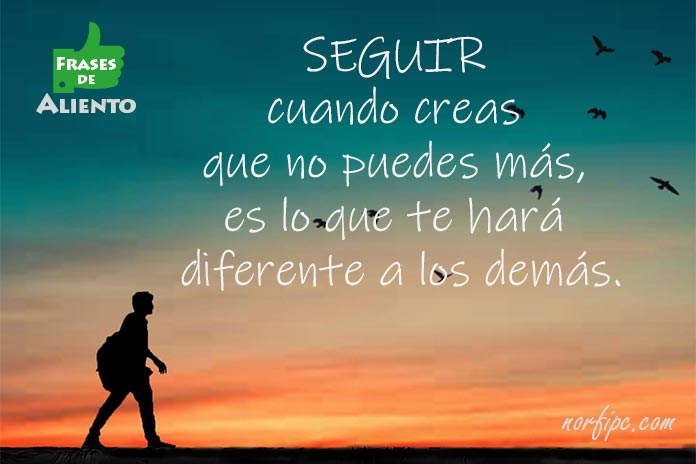